In [ ]:
print("test")

In [57]:
%pip install requests
%pip install zeep
%pip install openml
%pip install seaborn
%pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: c:\Users\Ratiba Zaid\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: c:\Users\Ratiba Zaid\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: c:\Users\Ratiba Zaid\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: c:\Users\Ratiba Zaid\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: c:\Users\Ratiba Zaid\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [58]:
import requests
from pprint import pprint
import pandas as pd
from zeep import Client
import logging
import openml
import sqlite3
import xml.etree.ElementTree as ET


# API Number of motor vehicles per 1,000 inhabitants 

Below you can find the end points. We will use the TypedDataSet end point.
```
{
  "odata.metadata":"https://opendata.cbs.nl/ODataApi/OData/85235NED/$metadata","value":[
    {
      "name":"TableInfos","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/TableInfos"
    },{
      "name":"UntypedDataSet","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/UntypedDataSet"
    },{
      "name":"TypedDataSet","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/TypedDataSet"
    },{
      "name":"DataProperties","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/DataProperties"
    },{
      "name":"CategoryGroups","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/CategoryGroups"
    },{
      "name":"RegioS","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/RegioS"
    },{
      "name":"Perioden","url":"https://opendata.cbs.nl/ODataApi/odata/85235NED/Perioden"
    }
  ]
}
```

In [59]:
url = "https://opendata.cbs.nl/ODataApi/odata/85235NED/TypedDataSet"
response= requests.get(url)
users= response.json()
print(users)



{'odata.metadata': 'https://opendata.cbs.nl/ODataApi/OData/85235NED/$metadata#Cbs.OData.WebAPI.TypedDataSet', 'value': [{'ID': 0, 'RegioS': 'NL01  ', 'Perioden': '2019JJ00', 'TotaalWegvoertuigen_1': 11372065, 'TotaalMotorvoertuigen_2': 10199679, 'TotaalPersonenautoS_3': 8442982, 'PersonenautoSRelatief_4': 489, 'InBezitNatuurlijkePersonen_5': 7452085, 'InBezitNatuurlijkePersonenRelatief_6': 431, 'TotaalBedrijfsvoertuigen_7': 2283037, 'TotaalBedrijfsmotorvoertuigen_8': 1110651, 'TotaalAanhangwagensEnOpleggers_9': 1172386, 'TotaalBedrijfsmotorvoertuigen_10': 1110651, 'Bestelauto_11': 903005, 'VrachtautoExclTrekkerVoorOplegger_12': 61652, 'TrekkerVoorOplegger_13': 78788, 'SpeciaalVoertuig_14': 57693, 'Bus_15': 9513, 'TotaalAanhangwagensEnOpleggers_16': 1172386, 'Aanhangwagen_17': 1008412, 'Oplegger_18': 163974, 'TotaalMotorfietsen_19': 646046, 'MotorfietsenRelatief_20': 37}, {'ID': 1, 'RegioS': 'NL01  ', 'Perioden': '2020JJ00', 'TotaalWegvoertuigen_1': 11567203, 'TotaalMotorvoertuigen_2': 

##### In order to make the output above more readable print the following cell

In [ ]:
#this will print the typed dataset in json format, so name value pairs
url = "https://opendata.cbs.nl/ODataApi/odata/85235NED/TypedDataSet"
posts = requests.get(url).json()

pprint (posts)





{'odata.metadata': 'https://opendata.cbs.nl/ODataApi/OData/85235NED/$metadata#Cbs.OData.WebAPI.TypedDataSet',
 'value': [{'Aanhangwagen_17': 1008412,
            'Bestelauto_11': 903005,
            'Bus_15': 9513,
            'ID': 0,
            'InBezitNatuurlijkePersonenRelatief_6': 431,
            'InBezitNatuurlijkePersonen_5': 7452085,
            'MotorfietsenRelatief_20': 37,
            'Oplegger_18': 163974,
            'Perioden': '2019JJ00',
            'PersonenautoSRelatief_4': 489,
            'RegioS': 'NL01  ',
            'SpeciaalVoertuig_14': 57693,
            'TotaalAanhangwagensEnOpleggers_16': 1172386,
            'TotaalAanhangwagensEnOpleggers_9': 1172386,
            'TotaalBedrijfsmotorvoertuigen_10': 1110651,
            'TotaalBedrijfsmotorvoertuigen_8': 1110651,
            'TotaalBedrijfsvoertuigen_7': 2283037,
            'TotaalMotorfietsen_19': 646046,
            'TotaalMotorvoertuigen_2': 10199679,
            'TotaalPersonenautoS_3': 8442982,
   

In [61]:
# select columns by first selecting the "value" key from json format
# then specify the specific columns
dfposts = pd.DataFrame(posts["value"])[['Aanhangwagen_17',
            'Bestelauto_11',
            'Bus_15',
            'ID',
            'InBezitNatuurlijkePersonenRelatief_6',
            'InBezitNatuurlijkePersonen_5',
            'MotorfietsenRelatief_20',
            'Oplegger_18',
            'Perioden',
            'PersonenautoSRelatief_4',
            'RegioS',
            'SpeciaalVoertuig_14',
            'TotaalAanhangwagensEnOpleggers_16',
            'TotaalAanhangwagensEnOpleggers_9',
            'TotaalBedrijfsmotorvoertuigen_10',
            'TotaalBedrijfsmotorvoertuigen_8',
            'TotaalBedrijfsvoertuigen_7',
            'TotaalMotorfietsen_19',
            'TotaalMotorvoertuigen_2',
            'TotaalPersonenautoS_3',
            'TotaalWegvoertuigen_1',
            'TrekkerVoorOplegger_13',
            'VrachtautoExclTrekkerVoorOplegger_12']]
dfposts.head()



,Aanhangwagen_17,Bestelauto_11,Bus_15,ID,InBezitNatuurlijkePersonenRelatief_6,InBezitNatuurlijkePersonen_5,MotorfietsenRelatief_20,Oplegger_18,Perioden,PersonenautoSRelatief_4,...,TotaalAanhangwagensEnOpleggers_9,TotaalBedrijfsmotorvoertuigen_10,TotaalBedrijfsmotorvoertuigen_8,TotaalBedrijfsvoertuigen_7,TotaalMotorfietsen_19,TotaalMotorvoertuigen_2,TotaalPersonenautoS_3,TotaalWegvoertuigen_1,TrekkerVoorOplegger_13,VrachtautoExclTrekkerVoorOplegger_12
0,1008412,903005,9513,0,431,7452085,37,163974,2019JJ00,489,...,1172386,1110651,1110651,2283037,646046,10199679,8442982,11372065,78788,61652
1,1023980,927251,9699,1,434,7548770,38,168502,2020JJ00,493,...,1192482,1135943,1135943,2328425,654387,10374721,8584391,11567203,80118,61746
2,1029636,945433,9050,2,440,7683236,38,170014,2021JJ00,497,...,1199650,1151740,1151740,2351390,666597,10504756,8686419,11704406,79932,60831
3,1051486,974792,8532,3,444,7803950,39,177294,2022JJ00,502,...,1228780,1182857,1182857,2411637,677787,10688353,8827709,11917133,82436,60867
4,1069827,989841,8756,4,440,7842473,39,185262,2023JJ00,501,...,1255089,1201061,1201061,2456150,690724,10808892,8917107,12063981,85679,60811


In [62]:
dfposts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Aanhangwagen_17                       119 non-null    int64 
 1   Bestelauto_11                         119 non-null    int64 
 2   Bus_15                                119 non-null    int64 
 3   ID                                    119 non-null    int64 
 4   InBezitNatuurlijkePersonenRelatief_6  119 non-null    int64 
 5   InBezitNatuurlijkePersonen_5          119 non-null    int64 
 6   MotorfietsenRelatief_20               119 non-null    int64 
 7   Oplegger_18                           119 non-null    int64 
 8   Perioden                              119 non-null    object
 9   PersonenautoSRelatief_4               119 non-null    int64 
 10  RegioS                                119 non-null    object
 11  SpeciaalVoertuig_14             

In [63]:
dfposts.describe(include="all")

,Aanhangwagen_17,Bestelauto_11,Bus_15,ID,InBezitNatuurlijkePersonenRelatief_6,InBezitNatuurlijkePersonen_5,MotorfietsenRelatief_20,Oplegger_18,Perioden,PersonenautoSRelatief_4,...,TotaalAanhangwagensEnOpleggers_9,TotaalBedrijfsmotorvoertuigen_10,TotaalBedrijfsmotorvoertuigen_8,TotaalBedrijfsvoertuigen_7,TotaalMotorfietsen_19,TotaalMotorvoertuigen_2,TotaalPersonenautoS_3,TotaalWegvoertuigen_1,TrekkerVoorOplegger_13,VrachtautoExclTrekkerVoorOplegger_12
count,1.190000e+02,1.190000e+02,119.000000,119.000000,119.000000,1.190000e+02,119.000000,119.00000,119,119.000000,...,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,119.000000,1.190000e+02,1.190000e+02,1.190000e+02,119.000000,119.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019JJ00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.854826e+05,1.713652e+05,1599.781513,59.000000,458.327731,1.371150e+06,41.445378,31314.02521,NaN,531.352941,...,2.167967e+05,2.084077e+05,2.084077e+05,4.252043e+05,119986.058824,1.885717e+06,1.557323e+06,2.102513e+06,14653.285714,10856.092437
std,2.359257e+05,2.222785e+05,2209.500400,34.496377,43.597953,1.791485e+06,6.256790,41848.47121,NaN,92.283424,...,2.769861e+05,2.701247e+05,2.701247e+05,5.464519e+05,155689.531752,2.460088e+06,2.034669e+06,2.735181e+06,19137.159198,14132.059518
min,2.181000e+04,2.361800e+04,51.000000,0.000000,375.000000,1.728080e+05,30.000000,2359.00000,NaN,421.000000,...,2.416900e+04,2.922200e+04,2.922200e+04,6.392300e+04,15091.000000,2.477690e+05,2.013010e+05,2.824700e+05,1414.000000,1156.000000
25%,6.106750e+04,4.746650e+04,367.000000,29.500000,422.500000,3.145290e+05,36.000000,4977.00000,NaN,494.500000,...,6.587250e+04,5.816600e+04,5.816600e+04,1.226150e+05,30465.500000,4.397930e+05,3.646235e+05,4.965140e+05,3261.000000,2796.000000
50%,1.131420e+05,1.111590e+05,901.000000,59.000000,469.000000,8.491200e+05,41.000000,16419.00000,NaN,525.000000,...,1.295610e+05,1.382770e+05,1.382770e+05,2.881580e+05,83721.000000,1.132392e+06,9.093020e+05,1.306028e+06,7841.000000,6062.000000
75%,1.834855e+05,1.717850e+05,1628.000000,88.500000,492.500000,1.504870e+06,45.500000,39000.00000,NaN,545.500000,...,2.208010e+05,2.096705e+05,2.096705e+05,4.280710e+05,121018.500000,1.981126e+06,1.656020e+06,2.177265e+06,17043.000000,12079.500000


In [64]:
dfposts.isnull().sum()

Aanhangwagen_17                         0
Bestelauto_11                           0
Bus_15                                  0
ID                                      0
InBezitNatuurlijkePersonenRelatief_6    0
InBezitNatuurlijkePersonen_5            0
MotorfietsenRelatief_20                 0
Oplegger_18                             0
Perioden                                0
PersonenautoSRelatief_4                 0
RegioS                                  0
SpeciaalVoertuig_14                     0
TotaalAanhangwagensEnOpleggers_16       0
TotaalAanhangwagensEnOpleggers_9        0
TotaalBedrijfsmotorvoertuigen_10        0
TotaalBedrijfsmotorvoertuigen_8         0
TotaalBedrijfsvoertuigen_7              0
TotaalMotorfietsen_19                   0
TotaalMotorvoertuigen_2                 0
TotaalPersonenautoS_3                   0
TotaalWegvoertuigen_1                   0
TrekkerVoorOplegger_13                  0
VrachtautoExclTrekkerVoorOplegger_12    0
dtype: int64

#### Since we want to use this data to portray the impact of cars in specific regions on the air quality, we choose to use the following attributes from this data source:
```
columns_vehicledb = ['Aanhangwagen_17',
            'Bestelauto_11',
            'Bus_15',
            'InBezitNatuurlijkePersonenRelatief_6',
            'InBezitNatuurlijkePersonen_5',
            'MotorfietsenRelatief_20',
            'Oplegger_18',
            'PersonenautoSRelatief_4',
            'SpeciaalVoertuig_14',
            'TotaalAanhangwagensEnOpleggers_16',
            'TotaalAanhangwagensEnOpleggers_9',
            'TotaalBedrijfsmotorvoertuigen_10',
            'TotaalBedrijfsmotorvoertuigen_8',
            'TotaalBedrijfsvoertuigen_7',
            'TotaalMotorfietsen_19',
            'TotaalMotorvoertuigen_2',
            'TotaalPersonenautoS_3',
            'TotaalWegvoertuigen_1',
            'TrekkerVoorOplegger_13',
            'VrachtautoExclTrekkerVoorOplegger_12']

```

In [65]:
print(dfposts["RegioS"].nunique(), "different regions")
print(dfposts["RegioS"].unique())
print(dfposts["RegioS"].value_counts())

17 different regions
['NL01  ' 'LD01  ' 'LD02  ' 'LD03  ' 'LD04  ' 'PV20  ' 'PV21  ' 'PV22  '
 'PV23  ' 'PV24  ' 'PV25  ' 'PV26  ' 'PV27  ' 'PV28  ' 'PV29  ' 'PV30  '
 'PV31  ']
RegioS
NL01      7
LD01      7
LD02      7
LD03      7
LD04      7
PV20      7
PV21      7
PV22      7
PV23      7
PV24      7
PV25      7
PV26      7
PV27      7
PV28      7
PV29      7
PV30      7
PV31      7
Name: count, dtype: int64


There are 17 different regios, divided in the following two categories: LD (landsdeel) and PV (provincies). We choose to primiraly focus on provinces due to data granularity. 

In [66]:
dfprovince = dfposts[dfposts["RegioS"].str.startswith("PV")]
print(dfprovince)

     Aanhangwagen_17  Bestelauto_11  Bus_15   ID  \
35             44354          31359      99   35   
36             45012          32179     291   36   
37             45677          33225     343   37   
38             46662          34112     346   38   
39             47653          34680     372   39   
..               ...            ...     ...  ...   
114            70317          52209     351  114   
115            72178          53705     332  115   
116            74049          54396     361  116   
117            74725          55128     362  117   
118            75962          56734     352  118   

     InBezitNatuurlijkePersonenRelatief_6  InBezitNatuurlijkePersonen_5  \
35                                    431                        251789   
36                                    436                        255316   
37                                    444                        260707   
38                                    450                        265561   


https://standaarden.overheid.nl/tooi/waardelijsten/expression?lijst_uri=https%3A%2F%2Fidentifier.overheid.nl%2Ftooi%2Fset%2Frwc_provincies_compleet%2F1

This website was used to create the encoded values

In [67]:
columns_vehicledb = ['Aanhangwagen_17',
            'Bestelauto_11',
            'Bus_15',
            'InBezitNatuurlijkePersonenRelatief_6',
            'InBezitNatuurlijkePersonen_5',
            'MotorfietsenRelatief_20',
            'Oplegger_18',
            'PersonenautoSRelatief_4',
            'SpeciaalVoertuig_14',
            'TotaalAanhangwagensEnOpleggers_16',
            'TotaalAanhangwagensEnOpleggers_9',
            'TotaalBedrijfsmotorvoertuigen_10',
            'TotaalBedrijfsmotorvoertuigen_8',
            'TotaalBedrijfsvoertuigen_7',
            'TotaalMotorfietsen_19',
            'TotaalMotorvoertuigen_2',
            'TotaalPersonenautoS_3',
            'TotaalWegvoertuigen_1',
            'TrekkerVoorOplegger_13',
            'VrachtautoExclTrekkerVoorOplegger_12']

pvencoding = {'PV20':'Groningen',
              'PV21':'Friesland',
              'PV22':'Drenthe',
              'PV23':'Overijssel',  
              'PV24':'Flevoland',
              'PV25':'Gelderland',
              'PV26':'Utrecht',
              'PV27':'Noord-Holland',
              'PV28':'Zuid-Holland',
              'PV29':'Zeeland',
              'PV30':'Noord-Brabant',
              'PV31':'Limburg'}


dfprovince = dfprovince.groupby('RegioS')[columns_vehicledb].sum().reset_index()
dfprovince["Sum"] = dfprovince[columns_vehicledb].sum(axis=1)
dfprovince['RegioS'] = dfprovince['RegioS'].astype(str).str.strip()
dfprovince['RegioS'] = dfprovince['RegioS'].map(pvencoding)
print(dfprovince[["RegioS","Sum"]])


           RegioS       Sum
0       Groningen  11936457
1       Friesland  14990976
2         Drenthe  11755668
3      Overijssel  25136738
4       Flevoland  12550586
5      Gelderland  43979534
6         Utrecht  27202822
7   Noord-Holland  47438165
8    Zuid-Holland  62190626
9         Zeeland   8732228
10  Noord-Brabant  57201144
11        Limburg  23560147


#### Check if this also contains the LD values

In [68]:
dftotal = dfprovince.groupby('RegioS')[columns_vehicledb].sum().sum()

dftotal["Sum"] = dftotal[columns_vehicledb].sum()

print(dftotal)

Aanhangwagen_17                           7357478
Bestelauto_11                             6797487
Bus_15                                      63458
InBezitNatuurlijkePersonenRelatief_6        38589
InBezitNatuurlijkePersonen_5             54388946
MotorfietsenRelatief_20                      3503
Oplegger_18                               1242123
PersonenautoSRelatief_4                     45252
SpeciaalVoertuig_14                        394020
TotaalAanhangwagensEnOpleggers_16         8599601
TotaalAanhangwagensEnOpleggers_9          8599601
TotaalBedrijfsmotorvoertuigen_10          8266837
TotaalBedrijfsmotorvoertuigen_8           8266837
TotaalBedrijfsvoertuigen_7               16866438
TotaalMotorfietsen_19                     4759447
TotaalMotorvoertuigen_2                  74800095
TotaalPersonenautoS_3                    61773811
TotaalWegvoertuigen_1                    83399696
TrekkerVoorOplegger_13                     581247
VrachtautoExclTrekkerVoorOplegger_12       430625


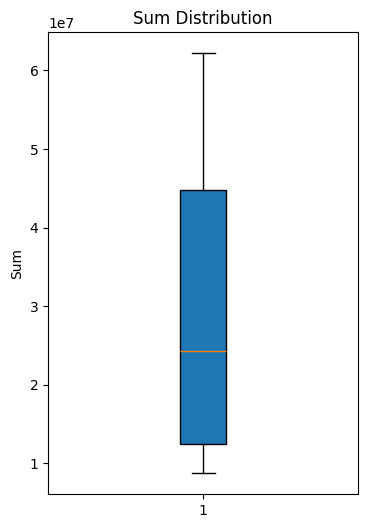

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,6))
sum = dfprovince['Sum'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(sum, vert=True, patch_artist=True)
plt.title("Sum Distribution")
plt.ylabel("Sum")
plt.show()

Made this visualization code with Farheen.

In [70]:
%pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: c:\Users\Ratiba Zaid\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [71]:
import plotly.express as px


bar = px.bar(dfprovince, x='RegioS', y= 'Sum', title='Bar chart of sum of cars per region')
bar.update_layout(yaxis_title='Sum of cars', xaxis_title= "Region Code", barmode='group') 

bar.show()

##### Standardize numerical data below, so that this data could be used for the predictive part (machine learning algorithms, such as SVM, dbscan, etc.)

https://www.datacamp.com/tutorial/normalization-vs-standardization


In [72]:
from sklearn.preprocessing import StandardScaler

standardization = dfprovince[['Aanhangwagen_17',
            'Bestelauto_11',
            'Bus_15',
            'InBezitNatuurlijkePersonenRelatief_6',
            'InBezitNatuurlijkePersonen_5',
            'MotorfietsenRelatief_20',
            'Oplegger_18',
            'PersonenautoSRelatief_4',
            'SpeciaalVoertuig_14',
            'TotaalAanhangwagensEnOpleggers_16',
            'TotaalAanhangwagensEnOpleggers_9',
            'TotaalBedrijfsmotorvoertuigen_10',
            'TotaalBedrijfsmotorvoertuigen_8',
            'TotaalBedrijfsvoertuigen_7',
            'TotaalMotorfietsen_19',
            'TotaalMotorvoertuigen_2',
            'TotaalPersonenautoS_3',
            'TotaalWegvoertuigen_1',
            'TrekkerVoorOplegger_13',
            'VrachtautoExclTrekkerVoorOplegger_12']]


standardize = StandardScaler().fit_transform(standardization)

dfstandardization = pd.DataFrame(standardize, columns=standardization.columns)
print(dfstandardization)

    Aanhangwagen_17  Bestelauto_11    Bus_15  \
0         -0.826098      -0.964925 -0.580957   
1         -0.491041      -0.676733  0.872484   
2         -0.723266      -1.008951 -0.931738   
3          0.210462      -0.215500  0.309090   
4         -1.310117      -0.711399 -1.004122   
5          1.461661       0.782840 -0.493932   
6         -0.431911       0.090297  0.308059   
7          0.523144       1.021050  2.670520   
8          1.177683       1.695970  0.593468   
9         -1.131960      -1.141830 -0.797901   
10         1.852307       1.695805 -0.364220   
11        -0.310864      -0.566621 -0.580751   

    InBezitNatuurlijkePersonenRelatief_6  InBezitNatuurlijkePersonen_5  \
0                              -0.305425                     -0.884965   
1                               0.691308                     -0.751204   
2                               1.356838                     -0.893761   
3                               0.153884                     -0.228767   
4    

#### IMPORTANT: CHOOSE SAMPLING DURING THE PREDICTIVE PART. IT IS NOW NOT POSSIBLE TO CHOOSE THIS, BECAUSE THE SAMPLES NEEDS TO BE ALIGNED WITH PM2.5 PM10 AND NO2 DATA.

# API Luchtmeetnet

In this part of the code, we will retrieve data from the luchtmeetnet api. We filter through the measurements using ?formula=NO2 , ?formula=PM10 and ?formula=PM25  

In [73]:
url_province = "https://api.luchtmeetnet.nl/open_api/stations"
posts_luchtmeetnet_province = requests.get(url_province).json()
pprint(posts_luchtmeetnet_province)


{'data': [{'location': 'Overschie-A13', 'number': 'NL01491'},
          {'location': 'Rotterdam-Maasvlakte', 'number': 'NL01497'},
          {'location': 'Rotterdam-HvHolland', 'number': 'NL01496'},
          {'location': 'Wijk aan Zee-Bosweg', 'number': 'NL49557'},
          {'location': 'Nistelrode-Gagelstraat', 'number': 'NL10248'},
          {'location': 'Ridderkerk-Voorweg', 'number': 'NL01912'},
          {'location': 'Meerssen- Beekerweg', 'number': 'NL50013'},
          {'location': 'Eijsden-Trichterweg', 'number': 'NL50012'},
          {'location': 'Rotterdam-Hoogvliet', 'number': 'NL01485'},
          {'location': 'Ridderkerk-A16', 'number': 'NL01489'},
          {'location': 'Zaandam-Wagenschotpad', 'number': 'NL49701'},
          {'location': 'Burgh-Haamstede', 'number': 'NL10320'},
          {'location': 'Zevenbergen-Galgenweg', 'number': 'NL53016'},
          {'location': 'Den Haag-Rebecquestraat', 'number': 'NL10404'},
          {'location': 'Den Haag-Amsterdamse Veerkad

In [74]:
dfposts_NO2_province = pd.DataFrame(posts_luchtmeetnet_province["data"])[['location','number']]
dfposts_NO2_province.head(10)

,location,number
0,Overschie-A13,NL01491
1,Rotterdam-Maasvlakte,NL01497
2,Rotterdam-HvHolland,NL01496
3,Wijk aan Zee-Bosweg,NL49557
4,Nistelrode-Gagelstraat,NL10248
5,Ridderkerk-Voorweg,NL01912
6,Meerssen- Beekerweg,NL50013
7,Eijsden-Trichterweg,NL50012
8,Rotterdam-Hoogvliet,NL01485
9,Ridderkerk-A16,NL01489


In [75]:
url = "https://api.luchtmeetnet.nl/open_api/measurements?formula=NO2" # get data from luchtmeetnet api and filter it so that only NO2 formulas will be retrieved
posts_luchtmeetnet_NO2 = requests.get(url).json()
#pprint(posts_luchtmeetnet_NO2)



In [76]:
dfposts_NO2 = pd.DataFrame(posts_luchtmeetnet_NO2["data"])[['formula',
           'station_number',
           'timestamp_measured',
           'value']]
print(dfposts_NO2.head(10))



  formula station_number         timestamp_measured  value
0     NO2        NL10550  2025-10-08T12:00:00+00:00  11.77
1     NO2        NL10538  2025-10-08T12:00:00+00:00   2.30
2     NO2        NL10236  2025-10-08T12:00:00+00:00  17.75
3     NO2        NL10138  2025-10-08T12:00:00+00:00   6.54
4     NO2        NL10450  2025-10-08T12:00:00+00:00   9.92
5     NO2        NL10918  2025-10-08T12:00:00+00:00   5.04
6     NO2        NL10442  2025-10-08T12:00:00+00:00  19.77
7     NO2        NL10230  2025-10-08T12:00:00+00:00  20.85
8     NO2        NL49551  2025-10-08T12:00:00+00:00  38.00
9     NO2        NL10641  2025-10-08T12:00:00+00:00  26.19


In [77]:
meanlocation = dfposts_NO2.groupby('station_number')['value'].mean().reset_index()

print(meanlocation)


   station_number      value
0         NL01485  15.792308
1         NL01487  22.430769
2         NL01488  14.446154
3         NL01491  33.146154
4         NL01493  35.915385
..            ...        ...
75        NL49704  23.583333
76        NL50002  11.750000
77        NL50003   9.727273
78        NL50010  12.833333
79        NL54004  21.588462

[80 rows x 2 columns]


### Note for visualization team: add legend for the red line which represent the threshold.

In [78]:
import plotly.express as px
import plotly.graph_objects as go

NO2_pvencoding = {'NL49703': 'NL49553' 'NL01493' 'NL10404' 'NL10318' 'NL01912' 'NL10742'
 'NL10538' 'NL01496' 'NL01495' 'NL49007' 'NL10636' 'NL49564' 'NL10818'
 'NL10550' 'NL49546' 'NL10136' 'NL10235' 'NL01913' 'NL10918' 'NL01487'
 'NL10639' 'NL01497' 'NL10644' 'NL10633' 'NL10741' 'NL10437' 'NL10247'
 'NL10445' 'NL10934' 'NL01494' 'NL10449' 'NL49017' 'NL49551' 'NL10617'
 'NL10442' 'NL10446' 'NL49565' 'NL10418' 'NL10138' 'NL10450' 'NL10929'
 'NL49561' 'NL01485' 'NL49003' 'NL10246' 'NL10133' 'NL49020' 'NL10444'
 'NL10738' 'NL10107' 'NL49680' 'NL10643' 'NL10248' 'NL10240' 'NL10230'
 'NL10131' 'NL49021' 'NL10938' 'NL49019' 'NL49014' 'NL10641' 'NL10237'
 'NL01491' 'NL10236' 'NL10241' 'NL49701' 'NL49012' 'NL10722' 'NL49704'
 'NL10807' 'NL01488' 'NL10301' 'NL10937' 'NL49002' 'NL50010' 'NL50002'
 'NL50003' 'NL54004' 'NL01489'}

bar = px.bar(meanlocation, x='station_number', y= 'value', title='Average µg/m³ NO2 per station')
bar.update_layout(yaxis_title='NO2 in µg/m³', xaxis_title= "Station numbers", barmode='group') 
#bar.add_shape(type='line', y0=40, y1=40, xref='paper', x0=0, x1=1, line_color='red')
bar.add_shape(
    legendrank=1,
    showlegend=True,
    type="line",
    xref="paper",
    line=dict(dash="5px", color='red'),
    x0=1,
    x1=0,
    y0=40,
    y1=40,
    name='Threshold of 40 µg/m³'
)

bar.show()

In [79]:
dfposts_NO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   formula             1000 non-null   object 
 1   station_number      1000 non-null   object 
 2   timestamp_measured  1000 non-null   object 
 3   value               1000 non-null   float64
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


In [80]:
print(dfposts_NO2["station_number"].isna().sum())
print(dfposts_NO2["station_number"].nunique(), "station points")
print(dfposts_NO2["station_number"].unique())
print(dfposts_NO2["station_number"].value_counts())

0
80 station points
['NL10550' 'NL10538' 'NL10236' 'NL10138' 'NL10450' 'NL10918' 'NL10442'
 'NL10230' 'NL49551' 'NL10641' 'NL10445' 'NL49017' 'NL10404' 'NL49704'
 'NL01488' 'NL49003' 'NL10107' 'NL49002' 'NL10449' 'NL10444' 'NL01496'
 'NL10738' 'NL10617' 'NL01912' 'NL10741' 'NL10929' 'NL10722' 'NL01485'
 'NL10742' 'NL10136' 'NL10241' 'NL10633' 'NL01497' 'NL10636' 'NL01494'
 'NL49553' 'NL49561' 'NL49014' 'NL49680' 'NL01913' 'NL01493' 'NL01487'
 'NL10818' 'NL10248' 'NL10418' 'NL49020' 'NL10318' 'NL10237' 'NL10246'
 'NL49007' 'NL49546' 'NL49703' 'NL10938' 'NL49019' 'NL10644' 'NL49022'
 'NL01491' 'NL10437' 'NL10934' 'NL49565' 'NL49012' 'NL54004' 'NL10133'
 'NL10446' 'NL10131' 'NL10240' 'NL10247' 'NL49701' 'NL10643' 'NL49021'
 'NL49564' 'NL10807' 'NL10301' 'NL10937' 'NL01495' 'NL10639' 'NL50003'
 'NL50010' 'NL10235' 'NL50002']
station_number
NL10538    13
NL10230    13
NL10442    13
NL10450    13
NL49017    13
           ..
NL10639    12
NL50003    11
NL10235     9
NL50002     8
NL49022     

In [81]:
dfposts_NO2.describe(include="all")

,formula,station_number,timestamp_measured,value
count,1000,1000,1000,1000.000000
unique,1,80,13,NaN
top,NO2,NL10538,2025-10-08T03:00:00+00:00,NaN
freq,1000,13,79,NaN
mean,NaN,NaN,NaN,18.119050
std,NaN,NaN,NaN,11.940768
min,NaN,NaN,NaN,2.300000
25%,NaN,NaN,NaN,8.797500
50%,NaN,NaN,NaN,14.440000
75%,NaN,NaN,NaN,24.100000


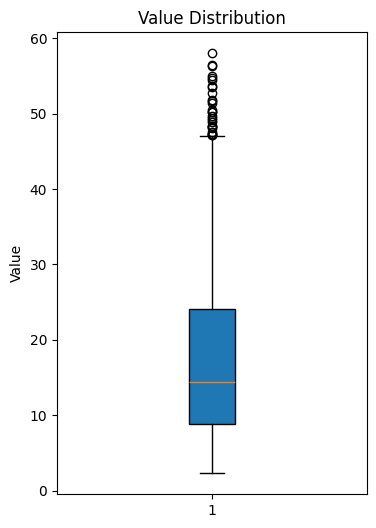

In [82]:
plt.figure(figsize=(4,6))
values = dfposts_NO2['value'].dropna() # If you don't remove NANs, default matplotlib function will fail
plt.boxplot(values, vert=True, patch_artist=True)
plt.title("Value Distribution")
plt.ylabel("Value")
plt.show()

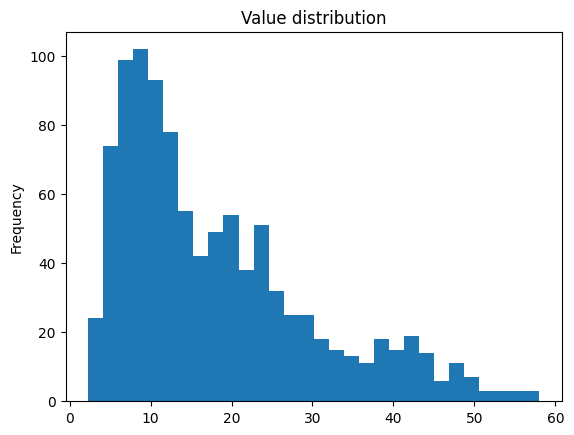

In [83]:
dfposts_NO2['value'].plot(kind='hist', bins=30, title='Value distribution')
plt.show()

In [84]:
!pip install seaborn

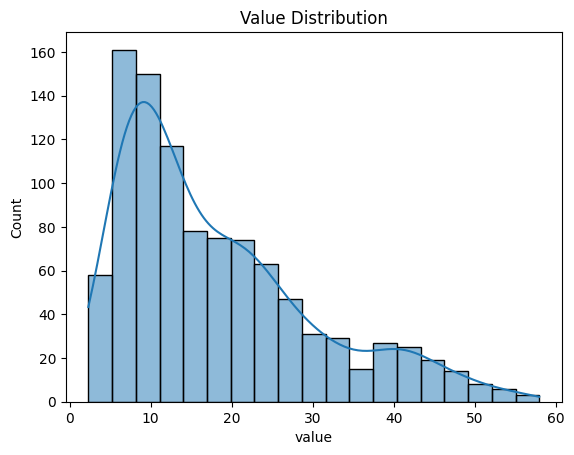

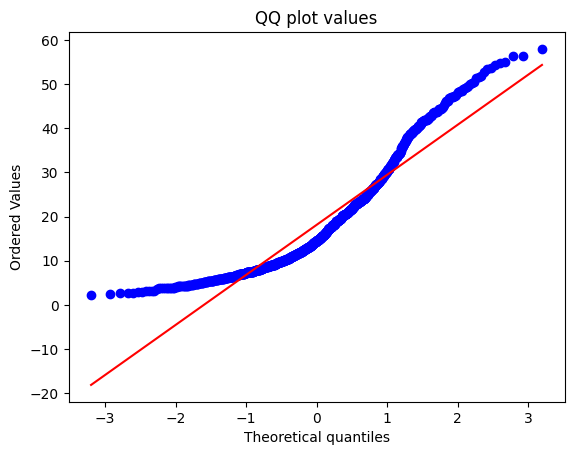

In [85]:
import scipy.stats as stats
import seaborn as sns 

sns.histplot(values, kde=True)
plt.title("Value Distribution")
plt.show()

stats.probplot(values, dist="norm", plot=plt)
plt.title("QQ plot values")
plt.show()

In [86]:
dfposts_NO2["value"].skew()


np.float64(1.0580951565083103)

In [87]:
c = abs(values.min())

In [88]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



shift = values + c + 0.001
log_x = np.log(shift)  
print(log_x)



0      2.644116
1      1.526274
2      2.998279
3      2.179400
4      2.503156
         ...   
995    2.463087
996    2.890427
997    2.438077
998    2.649078
999    2.495764
Name: value, Length: 1000, dtype: float64


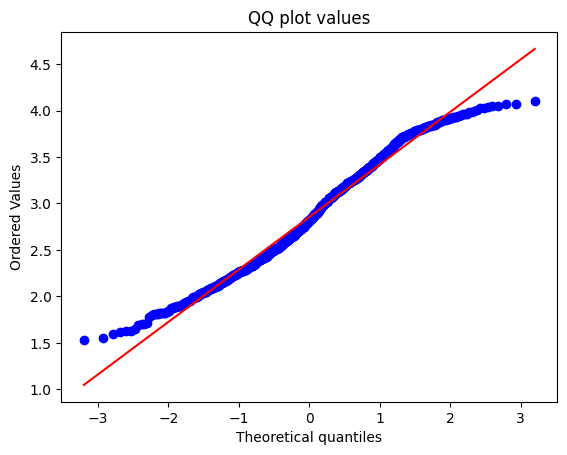

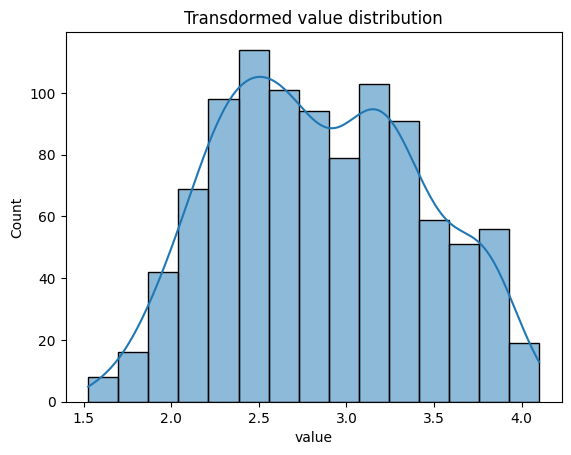

In [89]:
stats.probplot(log_x, dist="norm", plot=plt)
plt.title("QQ plot values")
plt.show()

sns.histplot(log_x,kde=True)
plt.title("Transdormed value distribution")
plt.show()


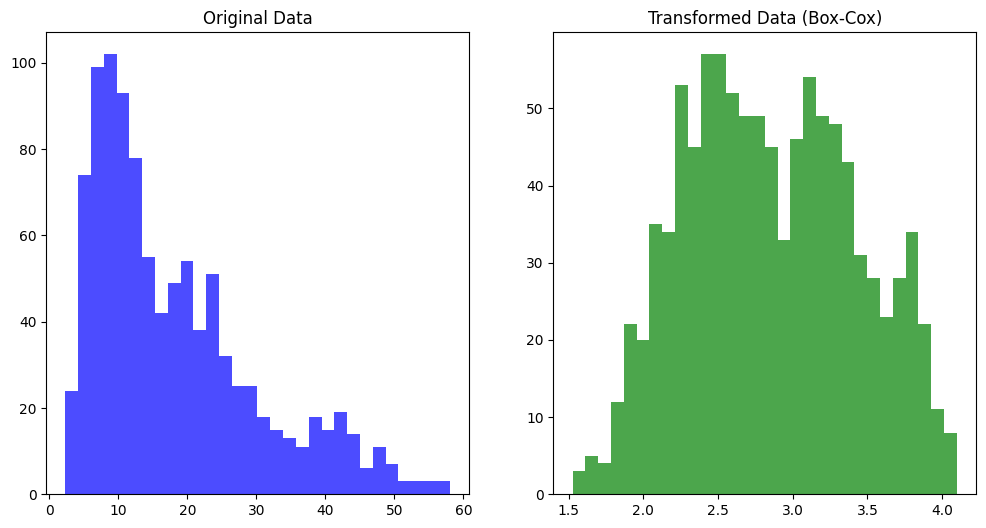

In [90]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(values, bins=30, color='blue', alpha=0.7)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.hist(log_x, bins=30, color='green', alpha=0.7)
plt.title('Transformed Data (Box-Cox)')

plt.show()

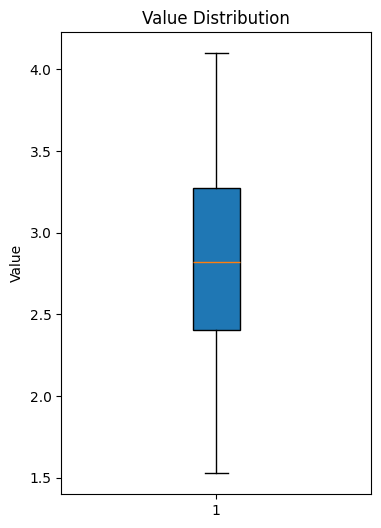

In [91]:
plt.figure(figsize=(4,6))
plt.boxplot(log_x, vert=True, patch_artist=True)
plt.title("Value Distribution")
plt.ylabel("Value")
plt.show()

For the predicition part, we need to use the log_x data. 

In [92]:
url = "https://api.luchtmeetnet.nl/open_api/measurements?formula=PM25" # get data from luchtmeetnet api and filter it so that only PM25 formulas will be retrieved
posts_luchtmeetnet_PM25 = requests.get(url).json()
#pprint(posts_luchtmeetnet_PM25)


In [93]:
url = "https://api.luchtmeetnet.nl/open_api/measurements?formula=PM10" # get data from luchtmeetnet api and filter it so that only PM10 formulas will be retrieved
posts_luchtmeetnet_PM10 = requests.get(url).json()
#pprint(posts_luchtmeetnet_PM10)

We know want to put it in a dataframe 

In [94]:
dfposts_PM25 = pd.DataFrame(posts_luchtmeetnet_PM25["data"])[['formula',
           'station_number',
           'timestamp_measured',
           'value']]
dfposts_PM25.head(10)

,formula,station_number,timestamp_measured,value
0,PM25,NL01493,2025-10-08T12:00:00+00:00,8.60
1,PM25,NL10738,2025-10-08T12:00:00+00:00,21.60
2,PM25,NL49573,2025-10-08T12:00:00+00:00,2.40
3,PM25,NL10538,2025-10-08T12:00:00+00:00,2.84
4,PM25,NL49703,2025-10-08T12:00:00+00:00,2.90
5,PM25,NL01495,2025-10-08T12:00:00+00:00,2.60
6,PM25,NL10742,2025-10-08T12:00:00+00:00,17.99
7,PM25,NL49704,2025-10-08T12:00:00+00:00,3.30
8,PM25,NL01488,2025-10-08T12:00:00+00:00,8.80
9,PM25,NL10934,2025-10-08T12:00:00+00:00,3.37


In [95]:
dfposts_PM10 = pd.DataFrame(posts_luchtmeetnet_PM10["data"])[['formula',
           'station_number',
           'timestamp_measured',
           'value']]
dfposts_PM10.head(10)

,formula,station_number,timestamp_measured,value
0,PM10,NL01496,2025-10-08T12:00:00+00:00,8.60
1,PM10,NL01494,2025-10-08T12:00:00+00:00,14.60
2,PM10,NL49012,2025-10-08T12:00:00+00:00,11.50
3,PM10,NL10445,2025-10-08T12:00:00+00:00,8.27
4,PM10,NL10636,2025-10-08T12:00:00+00:00,-12.21
5,PM10,NL10818,2025-10-08T12:00:00+00:00,5.71
6,PM10,NL49680,2025-10-08T12:00:00+00:00,12.80
7,PM10,NL10741,2025-10-08T12:00:00+00:00,14.67
8,PM10,NL10138,2025-10-08T12:00:00+00:00,5.71
9,PM10,NL01493,2025-10-08T12:00:00+00:00,20.60


# API Population density

```
{
  "odata.metadata":"https://opendata.cbs.nl/ODataApi/OData/85984NED/$metadata","value":[
    {
      "name":"TableInfos","url":"https://opendata.cbs.nl/ODataApi/odata/85984NED/TableInfos"
    },{
      "name":"UntypedDataSet","url":"https://opendata.cbs.nl/ODataApi/odata/85984NED/UntypedDataSet"
    },{
      "name":"TypedDataSet","url":"https://opendata.cbs.nl/ODataApi/odata/85984NED/TypedDataSet"
    },{
      "name":"DataProperties","url":"https://opendata.cbs.nl/ODataApi/odata/85984NED/DataProperties"
    },{
      "name":"CategoryGroups","url":"https://opendata.cbs.nl/ODataApi/odata/85984NED/CategoryGroups"
    },{
      "name":"WijkenEnBuurten","url":"https://opendata.cbs.nl/ODataApi/odata/85984NED/WijkenEnBuurten"
    }
  ]
}
```

* https://learn.microsoft.com/en-us/odata/concepts/queryoptions-overview -> explains how to use batches since thi API needs to parse from a very large data source. Since it is a very large data set, we will print the first 9000 rows before we begin with preprocessing

### NOTE: it is still not on the same abstraction level as the other APIs. To fix this, we need to specify codering_3 to only values that start with NL

In [96]:
url_population = "https://opendata.cbs.nl/ODataApi/odata/85984NED/TypedDataSet?$top=9000&$skip=0"
response_population= requests.get(url_population)
users_population= response.json()
posts_population = requests.get(url_population).json()

#pprint (posts_population)

In [97]:
dfposts_population = pd.DataFrame(posts_population["value"])[['Bevolkingsdichtheid_34',
           'Codering_3',
           'Gemeentenaam_1']]
dfposts_population.head(10)

,Bevolkingsdichtheid_34,Codering_3,Gemeentenaam_1
0,533.0,NL00,Nederland
1,94.0,GM1680,Aa en Hunze
2,245.0,WK168000,Aa en Hunze
3,1369.0,BU16800000,Aa en Hunze
4,12.0,BU16800009,Aa en Hunze
5,82.0,WK168001,Aa en Hunze
6,754.0,BU16800100,Aa en Hunze
7,11.0,BU16800109,Aa en Hunze
8,48.0,WK168002,Aa en Hunze
9,573.0,BU16800200,Aa en Hunze


## Note: DISCUSS IF IT IS USEFUL TO EVEN USE THIS SPECIFIC DATASET SINCE IT IS DIFFICULT TO EASILY LINK IT TO THE REGIOS ID OF THE API DATASET

In [98]:
dffiltered = dfposts_population[dfposts_population["Codering_3"].str.startswith("GM")]


dffiltered.value_counts() #154 Gemeentes
dfposts_population.value_counts() # Codering_3 has a total of lenght of 8527

Bevolkingsdichtheid_34  Codering_3  Gemeentenaam_1                          
1.0                     BU02289051  Ede                                         1
                        BU02460009  Heerde                                      1
                        BU05059800  Dordrecht                                   1
                        BU16800309  Aa en Hunze                                 1
                        BU16819709  Borger-Odoorn                               1
                                                                               ..
31046.0                 BU0363EM01  Amsterdam                                   1
31750.0                 BU0363KE03  Amsterdam                                   1
33964.0                 BU0363EU01  Amsterdam                                   1
35026.0                 BU0363EH02  Amsterdam                                   1
56582.0                 BU03840208  Diemen                                      1
Name: count, Length: 

# XML emission zone

In [99]:
!pip install xmltodict

In [100]:
!pip install lxml

<?xml version="1.0" encoding="UTF-8" standalone="yes"?>
<mc:messageContainer xmlns:mc="http://datex2.eu/schema/3/messageContainer" xmlns:nlxe="http://datex2.eu/schema/3/nlxExtensions" xmlns:inf="http://datex2.eu/schema/3/informationManagement" xmlns:comx="http://datex2.eu/schema/3/commonExtension" xmlns:cz="http://datex2.eu/schema/3/controlledZone" xmlns:ex="http://datex2.eu/schema/3/exchangeInformation" xmlns:tro="http://datex2.eu/schema/3/trafficRegulation" xmlns:loc="http://datex2.eu/schema/3/locationReferencing" xmlns:com="http://datex2.eu/schema/3/common" modelBaseVersion="3"><mc:payload xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"

In [101]:


import xml.etree.cElementTree as ET
tree = ET.parse(r'C:\Users\Ratiba Zaid\Downloads\emissiezones.xml\emissiezones.xml')
root = tree.getroot()

print(root.tag)
print(root.attrib)

print(root)
#namespace from julian's code
name_space = {
    'mc': 'http://datex2.eu/schema/3/messageContainer',
    'ex': 'http://datex2.eu/schema/3/exchange',
    'com': 'http://datex2.eu/schema/3/common',
    'comx': 'http://datex2.eu/schema/3/commonExtension',
    'cz': 'http://datex2.eu/schema/3/controlledZone',
    'tro': 'http://datex2.eu/schema/3/trafficRegulationOrder',
    'loc': 'http://datex2.eu/schema/3/locationReferencing',
    'xsi': 'http://www.w3.org/2001/XMLSchema-instance'
}

for elements in root.findall(".//loc:locationReferencing", name_space):
    print(elements.tag, elements.attrib)


{http://datex2.eu/schema/3/messageContainer}messageContainer
{'modelBaseVersion': '3'}
<Element '{http://datex2.eu/schema/3/messageContainer}messageContainer' at 0x000001CC0AE9B100>


##### JULIAN's code from untitled.ipynb=> first cell

In [102]:
# Read the XML file
xml_file_path = r'C:\Users\Ratiba Zaid\Downloads\emissiezones.xml\emissiezones.xml'

# Parse the XML file
tree = ET.parse(xml_file_path)
root = tree.getroot()

print(f"Root element: {root.tag}")
print(f"Root attributes: {root.attrib}")

# Find all emission zones
emission_zones = []

# Define correct namespaces based on the actual XML structure
namespaces = {
    'mc': 'http://datex2.eu/schema/3/messageContainer',
    'ex': 'http://datex2.eu/schema/3/exchange',
    'com': 'http://datex2.eu/schema/3/common',
    'comx': 'http://datex2.eu/schema/3/commonExtension',
    'cz': 'http://datex2.eu/schema/3/controlledZone',
    'tro': 'http://datex2.eu/schema/3/trafficRegulationOrder',
    'loc': 'http://datex2.eu/schema/3/locationReferencing',
    'xsi': 'http://www.w3.org/2001/XMLSchema-instance'
}

# Find controlled zone table
controlled_zone_table = root.find('.//cz:controlledZoneTable', namespaces)
if controlled_zone_table is not None:
    # Find all urban vehicle access regulations
    access_regulations = controlled_zone_table.findall('.//cz:urbanVehicleAccessRegulation', namespaces)
    
    print(f"\nFound {len(access_regulations)} emission zones")
    
    for regulation in access_regulations:
        zone_data = {}
        
        # Extract zone name
        name_element = regulation.find('.//cz:name/com:values/com:value[@lang="nl"]', namespaces)
        zone_data['name'] = name_element.text if name_element is not None else "Unknown"
        
        # Extract zone type
        zone_type_element = regulation.find('.//cz:controlledZoneType', namespaces)
        zone_data['type'] = zone_type_element.text if zone_type_element is not None else "Unknown"
        
        # Extract URL for further information
        url_element = regulation.find('.//cz:urlForFurtherInformation', namespaces)
        zone_data['url'] = url_element.text if url_element is not None else ""
        
        # Extract status
        status_element = regulation.find('.//cz:status', namespaces)
        zone_data['status'] = status_element.text if status_element is not None else "Unknown"
        
        # Extract issuing authority
        authority_element = regulation.find('.//tro:issuingAuthority/com:values/com:value[@lang="nl"]', namespaces)
        zone_data['authority'] = authority_element.text if authority_element is not None else "Unknown"
        
        # Extract regulation ID
        regulation_id_element = regulation.find('.//tro:regulationId', namespaces)
        zone_data['regulation_id'] = regulation_id_element.text if regulation_id_element is not None else "Unknown"
        
        # Extract validity period
        start_time_element = regulation.find('.//com:overallStartTime', namespaces)
        end_time_element = regulation.find('.//com:overallEndTime', namespaces)
        zone_data['start_date'] = start_time_element.text if start_time_element is not None else "Unknown"
        zone_data['end_date'] = end_time_element.text if end_time_element is not None else "Unknown"
        
        # Extract location coordinates (simplified - just count)
        coordinates = regulation.findall('.//loc:posList', namespaces)
        zone_data['coordinate_sets'] = len(coordinates)
        
        # Extract vehicle restrictions
        vehicle_conditions = regulation.findall('.//tro:vehicleCharacteristics', namespaces)
        zone_data['vehicle_restrictions'] = len(vehicle_conditions)
        
        emission_zones.append(zone_data)

print(emission_zones)

Root element: {http://datex2.eu/schema/3/messageContainer}messageContainer
Root attributes: {'modelBaseVersion': '3'}

Found 42 emission zones
[{'name': "LEZ 's-Hertogenbosch", 'type': 'lowEmissionZone', 'url': 'https://www.s-hertogenbosch.nl/ondernemer/milieu-en-afval/milieuzone-zero-emissie-zone/', 'status': 'active', 'authority': 'Unknown', 'regulation_id': 'Unknown', 'start_date': '2020-01-01T00:00:00Z', 'end_date': '2025-03-01T00:00:00Z', 'coordinate_sets': 1, 'vehicle_restrictions': 0}, {'name': 'ZE Dordrecht', 'type': 'lowEmissionZone', 'url': 'https://cms.dordrecht.nl/Inwoners/Overzicht_Inwoners/Parkeren_verkeer_en_vervoer/Overige_informatie/Zero_emissiezone_vanaf_2026', 'status': 'active', 'authority': 'Unknown', 'regulation_id': 'Unknown', 'start_date': '2026-01-01T00:00:00Z', 'end_date': '2026-12-31T23:00:00Z', 'coordinate_sets': 1, 'vehicle_restrictions': 0}, {'name': 'LEZ Delft', 'type': 'lowEmissionZone', 'url': 'https://www.delft.nl/milieuzone', 'status': 'active', 'auth